<a href="https://colab.research.google.com/github/Almamun809/Daily-NLP/blob/main/English_Fake_News_Detection_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/English_Dataset_One.csv"
!ls "/content/drive/My Drive/English_Dataset_two.csv"
!ls "/content/drive/My Drive/English_Dataset_Three.csv"

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Import the necessary libraries
import pandas as pd
import re
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Download stopwords and WordNetLemmatizer from NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset (replace this with your own dataset)
data = pd.read_csv('/content/drive/My Drive/English_Dataset_One.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<Axes: >

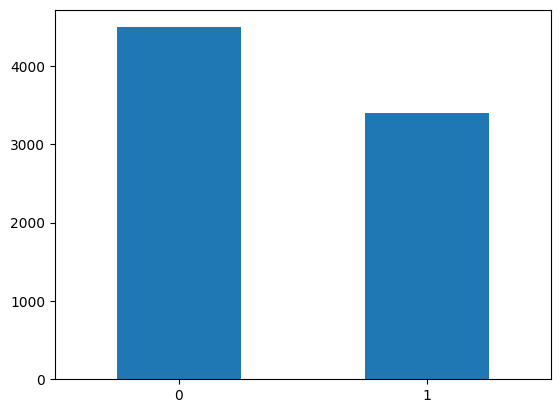

In [ ]:
data['label'].value_counts().plot(kind="bar", rot=0)

Prediction:  [1]
Accuracy: 0.9994930933975416
F1-score: 0.9994930933975416
Precision: 0.9994930933975416
Recall: 0.9994930933975416
Confusion matrix, without normalization


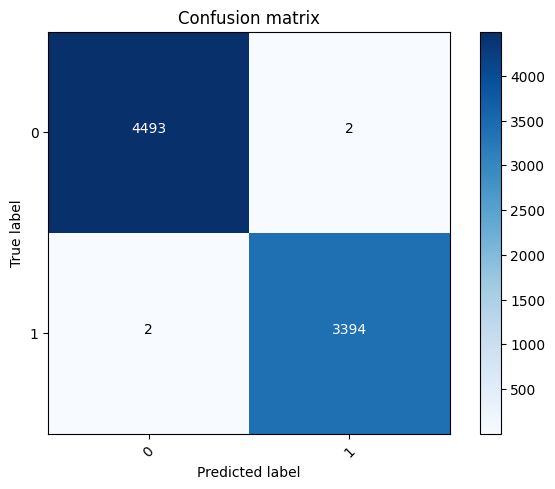

In [ ]:
# Define the data cleaning, preprocessing and lemmatization functions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+', '', text)
    # Remove punctuation and numbers
    text = ''.join(c for c in text if not c.isdigit() and c.isalnum() or c.isspace())
    return text

def preprocess(text):
    # Convert the text to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def lemmatize(text):
    # Lemmatize the text
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply the data cleaning, preprocessing and lemmatization functions to the dataset
data['text'] = data['text'].apply(clean_text)
data['text'] = data['text'].apply(preprocess)
data['text'] = data['text'].apply(lemmatize)

# Define the SVM pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

# Fit the SVM pipeline on the dataset
pipeline.fit(data['text'], data['label'])

# Test the classifier on a single data point
new_data = ['This is a new news article']
new_data = clean_text(new_data[0])
new_data = preprocess(new_data)
new_data = lemmatize(new_data)
prediction = pipeline.predict([new_data])

print("Prediction: ", prediction)

# Evaluate the model on the entire dataset
y_true = data['label']
y_pred = pipeline.predict(data['text'])

# Print the accuracy, f1-score, precision and recall
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)


#Confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[0]
Accuracy: 0.954401519949335
Precision: 0.9546188003934324
Recall: 0.954401519949335
F1 score: 0.9542827868398895
Confusion matrix, without normalization


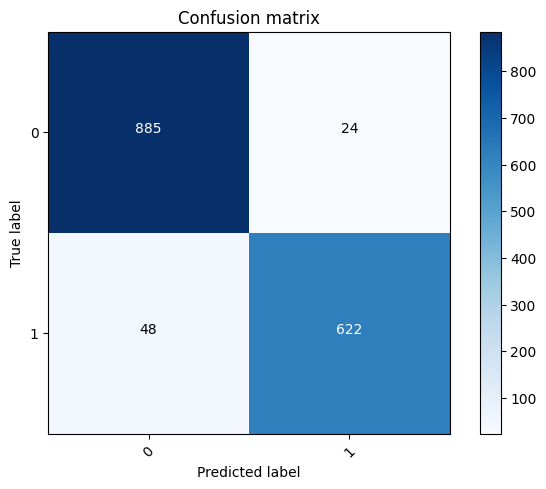

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import PassiveAggressiveClassifier

# Downloading necessary NLTK corpora and stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Reading the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/My Drive/English_Dataset_One.csv')

# Removing unnecessary columns, if any
data = data[['text', 'label']]

# Data cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if not word in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    return text

data['text'] = data['text'].apply(clean_text)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Creating TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Training the classifier
clf = PassiveAggressiveClassifier()
clf.fit(X_train, y_train)

# Testing the classifier on a single data
single_data = "This is a piece of real news"
single_data = clean_text(single_data)
single_data_vec = vectorizer.transform([single_data])
pred = clf.predict(single_data_vec)
print(pred)

# Evaluating the performance of the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

[1]
Accuracy: 0.9398353388220393
Precision: 0.9403966387987418
Recall: 0.9398353388220393
F1-Score: 0.93958114560839
Confusion matrix, without normalization


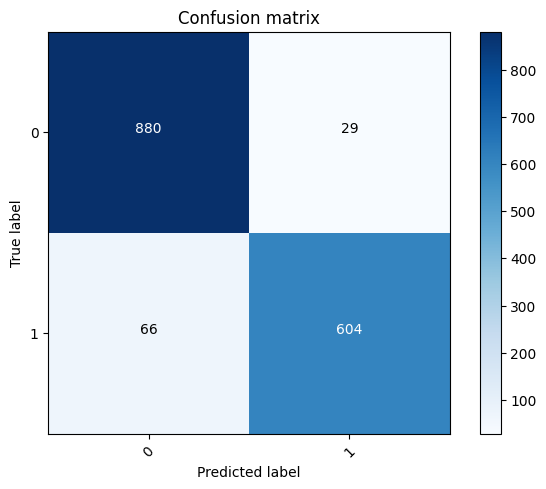

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/drive/My Drive/English_Dataset_One.csv')

# Efficient stopword removal, data cleaning, preprocessing, and lemmatization
stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text) # remove punctuations
    words = word_tokenize(text.lower()) # tokenize and convert to lowercase
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_list] # lemmatize and remove stopwords
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Test on single data
test_data = "This news is real"
test_data = preprocess(test_data)
test_data_tfidf = tfidf_vectorizer.transform([test_data])
predicted = clf.predict(test_data_tfidf)
print(predicted)

# Calculate accuracy, precision, recall, and F1-score
y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

[0]
Accuracy: 0.7327422419252692
Precision: 0.815938824612543
Recall: 0.7327422419252692
F1-Score: 0.6968155593865486
Confusion matrix, without normalization


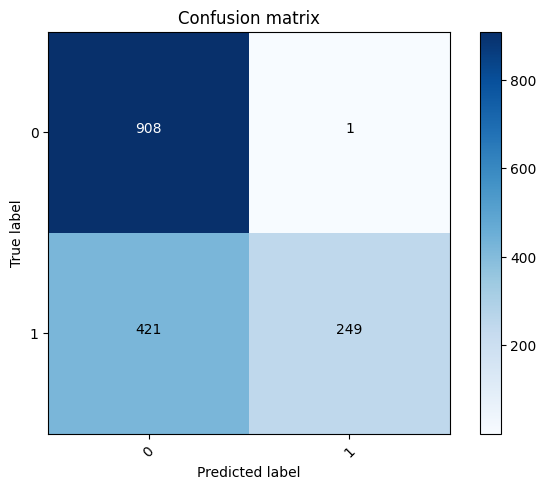

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/drive/My Drive/English_Dataset_One.csv')

# Efficient stopword removal, data cleaning, preprocessing, and lemmatization
stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text) # remove punctuations
    words = word_tokenize(text.lower()) # tokenize and convert to lowercase
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_list] # lemmatize and remove stopwords
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Test on single data
test_data = "This news is real"
test_data = preprocess(test_data)
test_data_tfidf = tfidf_vectorizer.transform([test_data])
predicted = clf.predict(test_data_tfidf)
print(predicted)

# Calculate accuracy, precision, recall, and F1-score
y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

**Dataset - 2**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Prediction:  [1]
Accuracy: 0.9996754827194548
F1-score: 0.9996754686891207
Precision: 0.9996756689026335
Recall: 0.9996754827194548
Confusion matrix, without normalization


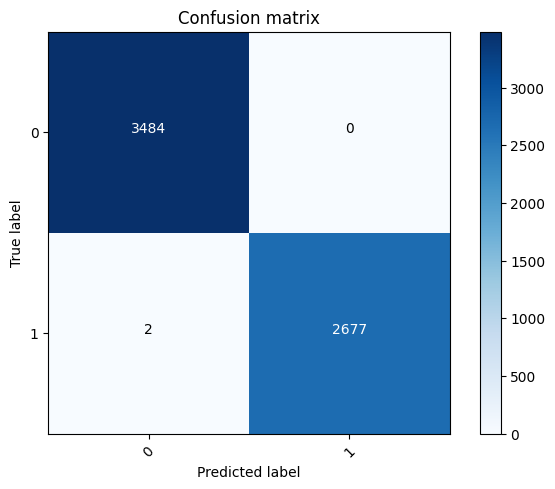

In [ ]:
# Import the necessary libraries
import pandas as pd
import re
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Download stopwords and WordNetLemmatizer from NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset (replace this with your own dataset)
data_2 = pd.read_csv('/content/drive/My Drive/English_Dataset_two.csv')


# Define the data cleaning, preprocessing and lemmatization functions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+', '', text)
    # Remove punctuation and numbers
    text = ''.join(c for c in text if not c.isdigit() and c.isalnum() or c.isspace())
    return text

def preprocess(text):
    # Convert the text to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def lemmatize(text):
    # Lemmatize the text
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply the data cleaning, preprocessing and lemmatization functions to the dataset
data_2['text'] = data_2['text'].apply(clean_text)
data_2['text'] = data_2['text'].apply(preprocess)
data_2['text'] = data_2['text'].apply(lemmatize)

# Define the SVM pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

# Fit the SVM pipeline on the dataset
pipeline.fit(data_2['text'], data_2['label'])

# Test the classifier on a single data point
new_data = ['This is a new news article']
new_data = clean_text(new_data[0])
new_data = preprocess(new_data)
new_data = lemmatize(new_data)
prediction = pipeline.predict([new_data])

print("Prediction: ", prediction)

# Evaluate the model on the entire dataset
y_true = data_2['label']
y_pred = pipeline.predict(data_2['text'])

# Print the accuracy, f1-score, precision and recall
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)


#Confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

<Axes: >

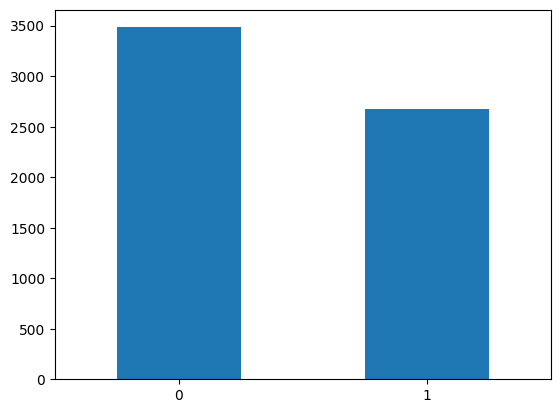

In [ ]:
data_2['label'].value_counts().plot(kind="bar", rot=0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[0]
Accuracy: 0.9383617193836172
Precision: 0.9384607066269329
Recall: 0.9383617193836172
F1 score: 0.9382499899592269
Confusion matrix, without normalization


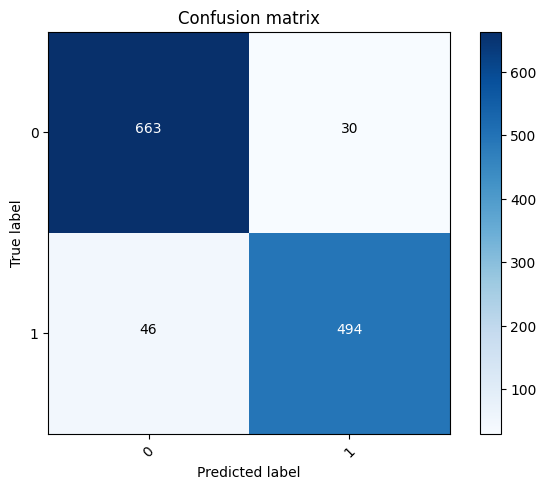

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import PassiveAggressiveClassifier

# Downloading necessary NLTK corpora and stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Reading the CSV file into a pandas DataFrame
data_2 = pd.read_csv('/content/drive/My Drive/English_Dataset_two.csv')

# Removing unnecessary columns, if any
data = data_2[['text', 'label']]

# Data cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if not word in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    return text

data_2['text'] = data_2['text'].apply(clean_text)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_2['text'], data_2['label'], test_size=0.2, random_state=42)

# Creating TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Training the classifier
clf = PassiveAggressiveClassifier()
clf.fit(X_train, y_train)

# Testing the classifier on a single data
single_data = "This is a piece of fake news"
single_data = clean_text(single_data)
single_data_vec = vectorizer.transform([single_data])
pred = clf.predict(single_data_vec)
print(pred)

# Evaluating the performance of the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

[1]
Accuracy: 0.9302514193025142
Precision: 0.9304277739234383
Recall: 0.9302514193025142
F1-Score: 0.9300894919230802
Confusion matrix, without normalization


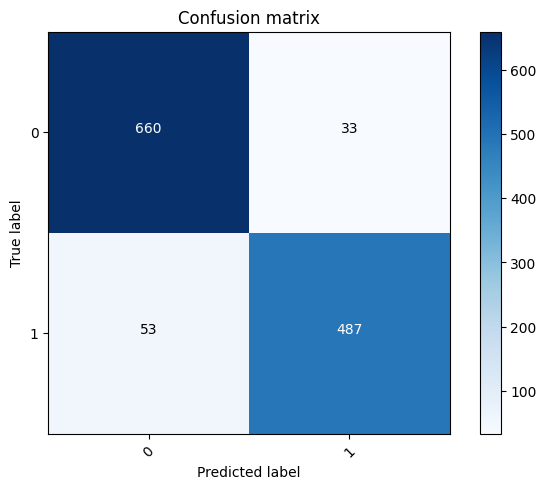

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Load dataset
df_2 = pd.read_csv('/content/drive/My Drive/English_Dataset_two.csv')

# Efficient stopword removal, data cleaning, preprocessing, and lemmatization
stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text) # remove punctuations
    words = word_tokenize(text.lower()) # tokenize and convert to lowercase
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_list] # lemmatize and remove stopwords
    return ' '.join(words)

df_2['text'] = df_2['text'].apply(preprocess)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_2['text'], df_2['label'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Test on single data
test_data = "This news is real"
test_data = preprocess(test_data)
test_data_tfidf = tfidf_vectorizer.transform([test_data])
predicted = clf.predict(test_data_tfidf)
print(predicted)

# Calculate accuracy, precision, recall, and F1-score
y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

[0]
Accuracy: 0.7242497972424979
Precision: 0.8150097865334474
Recall: 0.7242497972424979
F1-Score: 0.6880614152733986
Confusion matrix, without normalization


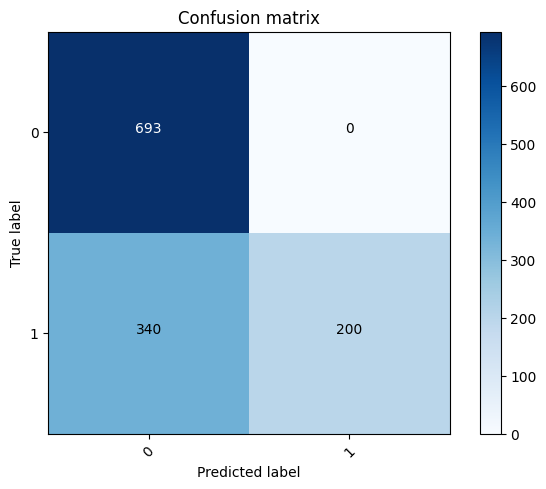

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Load dataset
df_2 = pd.read_csv('/content/drive/My Drive/English_Dataset_two.csv')

# Efficient stopword removal, data cleaning, preprocessing, and lemmatization
stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text) # remove punctuations
    words = word_tokenize(text.lower()) # tokenize and convert to lowercase
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_list] # lemmatize and remove stopwords
    return ' '.join(words)

df_2['text'] = df_2['text'].apply(preprocess)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_2['text'], df_2['label'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Test on single data
test_data = "This news is real"
test_data = preprocess(test_data)
test_data_tfidf = tfidf_vectorizer.transform([test_data])
predicted = clf.predict(test_data_tfidf)
print(predicted)

# Calculate accuracy, precision, recall, and F1-score
y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Prediction:  [1]
Accuracy: 1.0
F1-score: 1.0
Precision: 1.0
Recall: 1.0
Confusion matrix, without normalization


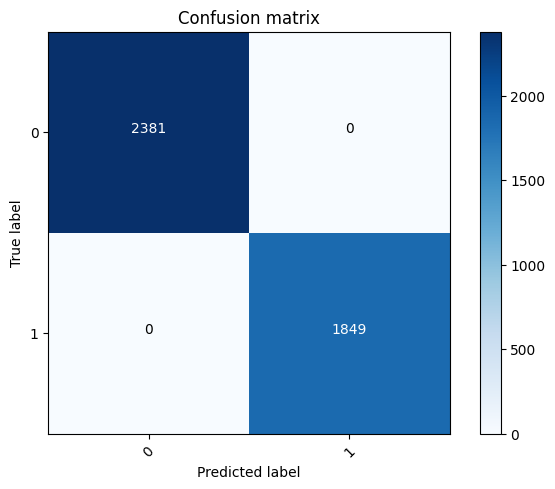

In [ ]:
# Import the necessary libraries
import pandas as pd
import re
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Download stopwords and WordNetLemmatizer from NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset (replace this with your own dataset)
data_3 = pd.read_csv('/content/drive/My Drive/English_Dataset_Three.csv')

# Define the data cleaning, preprocessing and lemmatization functions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+', '', text)
    # Remove punctuation and numbers
    text = ''.join(c for c in text if not c.isdigit() and c.isalnum() or c.isspace())
    return text

def preprocess(text):
    # Convert the text to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def lemmatize(text):
    # Lemmatize the text
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply the data cleaning, preprocessing and lemmatization functions to the dataset
data_3['text'] = data_3['text'].apply(clean_text)
data_3['text'] = data_3['text'].apply(preprocess)
data_3['text'] = data_3['text'].apply(lemmatize)

# Define the SVM pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

# Fit the SVM pipeline on the dataset
pipeline.fit(data_3['text'], data_3['label'])

# Test the classifier on a single data point
new_data = ['This is a new news article']
new_data = clean_text(new_data[0])
new_data = preprocess(new_data)
new_data = lemmatize(new_data)
prediction = pipeline.predict([new_data])

print("Prediction: ", prediction)

# Evaluate the model on the entire dataset
y_true = data_3['label']
y_pred = pipeline.predict(data_3['text'])

# Print the accuracy, f1-score, precision and recall
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)


#Confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

<Axes: >

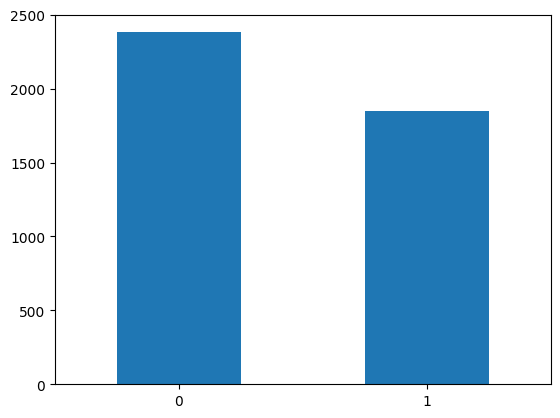

In [ ]:
data_3['label'].value_counts().plot(kind="bar", rot=0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[0]
Accuracy: 0.9408983451536643
Precision: 0.9409579753488773
Recall: 0.9408983451536643
F1 score: 0.9407937016205099
Confusion matrix, without normalization


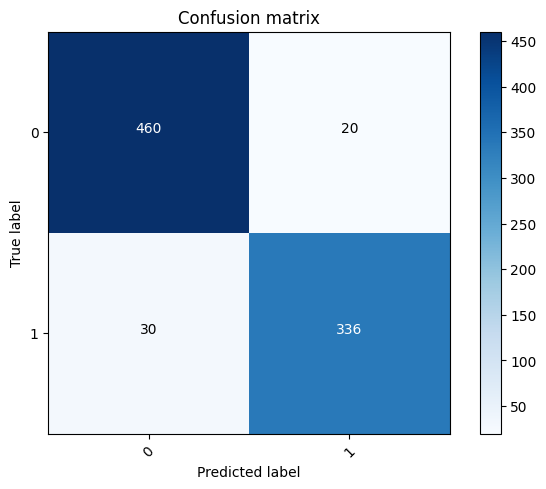

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import PassiveAggressiveClassifier

# Downloading necessary NLTK corpora and stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Reading the CSV file into a pandas DataFrame
data_3 = pd.read_csv('/content/drive/My Drive/English_Dataset_Three.csv')

# Removing unnecessary columns, if any
data_3 = data_3[['text', 'label']]

# Data cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if not word in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    return text

data_3['text'] = data_3['text'].apply(clean_text)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_3['text'], data_3['label'], test_size=0.2, random_state=42)

# Creating TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Training the classifier
clf = PassiveAggressiveClassifier()
clf.fit(X_train, y_train)

# Testing the classifier on a single data
single_data = "This is a piece of fake news"
single_data = clean_text(single_data)
single_data_vec = vectorizer.transform([single_data])
pred = clf.predict(single_data_vec)
print(pred)

# Evaluating the performance of the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

[1]
Accuracy: 0.9408983451536643
Precision: 0.9409579753488773
Recall: 0.9408983451536643
F1-Score: 0.9407937016205099
Confusion matrix, without normalization


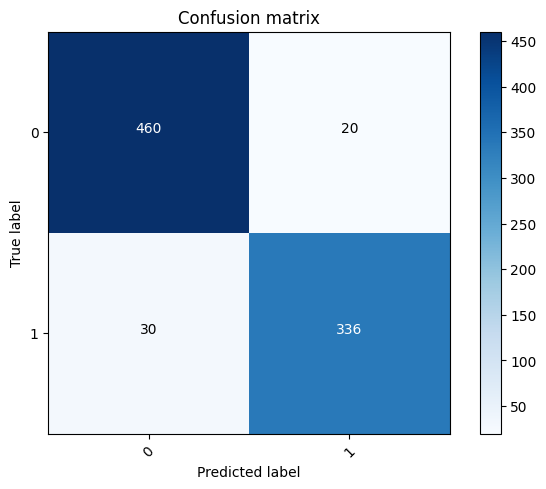

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Load dataset
df_3 = pd.read_csv('/content/drive/My Drive/English_Dataset_Three.csv')

# Efficient stopword removal, data cleaning, preprocessing, and lemmatization
stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text) # remove punctuations
    words = word_tokenize(text.lower()) # tokenize and convert to lowercase
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_list] # lemmatize and remove stopwords
    return ' '.join(words)

df_3['text'] = df_3['text'].apply(preprocess)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_3['text'], df_3['label'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Test on single data
test_data = "This news is real"
test_data = preprocess(test_data)
test_data_tfidf = tfidf_vectorizer.transform([test_data])
predicted = clf.predict(test_data_tfidf)
print(predicted)

# Calculate accuracy, precision, recall, and F1-score
y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

[0]
Accuracy: 0.7186761229314421
Precision: 0.8119283273079277
Recall: 0.7186761229314421
F1-Score: 0.6788523459122272
Confusion matrix, without normalization


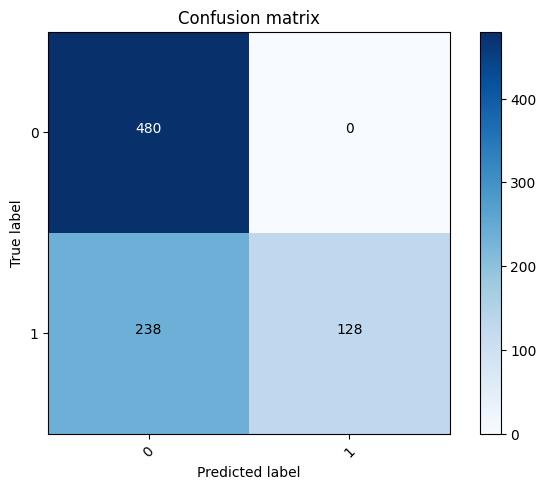

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Load dataset
df_3 = pd.read_csv('/content/drive/My Drive/English_Dataset_Three.csv')

# Efficient stopword removal, data cleaning, preprocessing, and lemmatization
stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text) # remove punctuations
    words = word_tokenize(text.lower()) # tokenize and convert to lowercase
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_list] # lemmatize and remove stopwords
    return ' '.join(words)

df_3['text'] = df_3['text'].apply(preprocess)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_3['text'], df_3['label'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Test on single data
test_data = "This news is real"
test_data = preprocess(test_data)
test_data_tfidf = tfidf_vectorizer.transform([test_data])
predicted = clf.predict(test_data_tfidf)
print(predicted)

# Calculate accuracy, precision, recall, and F1-score
y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])